## Neural Networks - Score: 0.88446

Validation set used in final model training.  Layers 500, 250.

In [1]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.metrics import roc_auc_score

pd.options.display.max_rows = 20
pd.options.display.max_columns = 100

### Process Data

In [2]:
# define path to data
path = URLs.path('march-comp')

In [3]:
# read in training set
df = pd.read_csv(path/'train.csv', low_memory=False)

In [4]:
# drop id col
del df['id']

In [5]:
# define dependent var
dep_var = 'target'

In [6]:
# define continuous & categorical cols
cont,cat = cont_cat_split(df, max_card=9000, dep_var=dep_var)

In [12]:
# no validation set
splits = RandomSplitter(valid_pct=0.)(range_of(df))

In [13]:
# create tabularpandas object
procs = [Categorify, Normalize]
to = TabularPandas(df, procs, cat, cont, 
                   y_names=dep_var, y_block=CategoryBlock, splits=splits)

In [14]:
# create dataloader object
dls = to.dataloaders(1024)

### Train Neural Net

In [15]:
# create learner
learn = tabular_learner(dls, layers=[500,250], metrics=accuracy)

SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=0.2089296132326126)

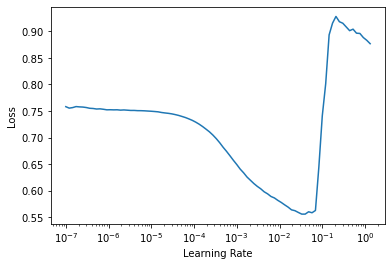

In [16]:
# checking learning rates
learn.lr_find()

In [17]:
# training learner 5 epochs
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.359652,None,None,00:11
1,0.354781,None,None,00:11
2,0.347818,None,None,00:11
3,0.334522,None,None,00:10
4,0.329135,None,None,00:09


/opt/conda/envs/fastai/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


### Submit Predictions

In [18]:
# read in test set
test = pd.read_csv(path/'test.csv', low_memory=False)

In [19]:
# convert test set to fastai tabular dataloader
# dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test, bs=1024)

In [20]:
# checking length of test set & dataloader - make sure same length
len(test), len(test_dl.train.xs)

(200000, 200000)

In [21]:
# get preds for test set
test_preds,test_targs = learn.get_preds(dl=test_dl)

In [22]:
# get probability = 1
sub_y = test_preds[:,1]

In [23]:
# create submission df
submission = pd.DataFrame({"id": test.id,"target": sub_y})

In [24]:
# save submission to csv
submission.to_csv('NN002.csv', index=False)